In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time
import importlib
import sys

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [4]:
from RNMF_simplified import *

In [5]:
with open('CVfiltered-combinedData.txt') as f:
    header = f.readline()
header = header.strip().split()

#f = open("combinedData-genes.txt", "r")
#genes = f.readlines()
#f.close()
#genes = [g.strip() for g in genes]

data = np.genfromtxt("CVfiltered-combinedData.txt", skip_header=1, usecols=range(2,len(header)))

logdata = np.log2(data + 1)

X = logdata / np.sum(logdata, axis = 0)
X = torch.tensor(X, requires_grad = False, dtype = torch.float32)
del data
del logdata

In [20]:
[m, n] = X.shape

q = 3
eps = 2.3e-16

D = torch.rand(m,q)
D += eps

D = NormDict(D)

alpha = PowerMethod(D)
eta = 1/alpha

In [23]:
lambda_star = 0.2
lambdaO = 0.4

EPOCH = 2000
LR = 1e-3  # learning rate
MNT = 0.8   # momentum variable

T = 30 # use even number

model = RNMF_Encoder_simplified(m, n, q, lambda_star, lambdaO, eta, T, D)
optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MNT)

obj = np.zeros(EPOCH + 1)
tol = 1e-7

for K in range(EPOCH):
    Z = model(X, q, lambda_star, lambdaO)
        
    loss = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")      # error
    #print(K, loss.data)
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step()                    # apply gradients
    model.zero_grad()
    
    Z = Z.detach()
    #model.D = DictUpdate(model.D, X, Z, lambda_star, q, eps)
    #model.D.detach_()
    #print(K, torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro"))
    obj[K+1] = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")
    print('Iter = {}; Obj = {}; Err = {}'.format(K+1, obj[K+1], np.abs((obj[K]-obj[K+1])/(obj[K] + eps))))
          
    if np.abs((obj[K]-obj[K+1])/(obj[K] + eps)) < tol:
        print("Algorithm converged as per defined tolerance")
        break

Iter = 1; Obj = 1.3716713190078735; Err = 5963788343512494.0
Iter = 2; Obj = 1.3709837198257446; Err = 0.0005012856743452542
Iter = 3; Obj = 1.3699973821640015; Err = 0.0007194379097867988
Iter = 4; Obj = 1.3687652349472046; Err = 0.0008993792490687952
Iter = 5; Obj = 1.36732816696167; Err = 0.0010499009975148133
Iter = 6; Obj = 1.365753412246704; Err = 0.0011517020953829037
Iter = 7; Obj = 1.3640354871749878; Err = 0.0012578588904202492
Iter = 8; Obj = 1.3622124195098877; Err = 0.0013365250994135036
Iter = 9; Obj = 1.3602871894836426; Err = 0.001413311168413659
Iter = 10; Obj = 1.3582934141159058; Err = 0.0014657017894093688
Iter = 11; Obj = 1.3562393188476562; Err = 0.0015122618183247935
Iter = 12; Obj = 1.3541100025177002; Err = 0.0015700151885916797
Iter = 13; Obj = 1.3519432544708252; Err = 0.0016001270523416558
Iter = 14; Obj = 1.3497246503829956; Err = 0.0016410482322336752
Iter = 15; Obj = 1.347460389137268; Err = 0.0016775727146163002
Iter = 16; Obj = 1.3451777696609497; Err =

Iter = 128; Obj = 1.0795913934707642; Err = 0.0013878267984216307
Iter = 129; Obj = 1.0781047344207764; Err = 0.0013770571523438622
Iter = 130; Obj = 1.0766351222991943; Err = 0.001363144112683631
Iter = 131; Obj = 1.0751781463623047; Err = 0.0013532680726393376
Iter = 132; Obj = 1.0737366676330566; Err = 0.0013406882702415987
Iter = 133; Obj = 1.0723108053207397; Err = 0.001327944136861846
Iter = 134; Obj = 1.070905327796936; Err = 0.001310699768042827
Iter = 135; Obj = 1.0695245265960693; Err = 0.001289377468788282
Iter = 136; Obj = 1.0681506395339966; Err = 0.0012845774247415963
Iter = 137; Obj = 1.0667898654937744; Err = 0.0012739533075745142
Iter = 138; Obj = 1.0654436349868774; Err = 0.0012619453469159608
Iter = 139; Obj = 1.064125657081604; Err = 0.0012370226467115458
Iter = 140; Obj = 1.0628105401992798; Err = 0.0012358661531862369
Iter = 141; Obj = 1.0615156888961792; Err = 0.0012183274950000004
Iter = 142; Obj = 1.0602439641952515; Err = 0.0011980272305255719
Iter = 143; Obj 

Iter = 253; Obj = 0.9724770188331604; Err = 0.0005509526782860874
Iter = 254; Obj = 0.9719282984733582; Err = 0.0005642502076405214
Iter = 255; Obj = 0.971390962600708; Err = 0.0005528554662871311
Iter = 256; Obj = 0.9708582162857056; Err = 0.000548436556971992
Iter = 257; Obj = 0.9703173637390137; Err = 0.0005570870572235354
Iter = 258; Obj = 0.9697839021682739; Err = 0.0005497805055081249
Iter = 259; Obj = 0.9692521691322327; Err = 0.0005483005387616704
Iter = 260; Obj = 0.9687238335609436; Err = 0.0005450960937875217
Iter = 261; Obj = 0.9681983590126038; Err = 0.0005424399918067933
Iter = 262; Obj = 0.9676710963249207; Err = 0.0005445812655795274
Iter = 263; Obj = 0.9671469330787659; Err = 0.0005416750052217986
Iter = 264; Obj = 0.9666261672973633; Err = 0.0005384557026353883
Iter = 265; Obj = 0.9661023020744324; Err = 0.0005419522465397436
Iter = 266; Obj = 0.965582549571991; Err = 0.0005379890942453859
Iter = 267; Obj = 0.9650714993476868; Err = 0.0005292662181299049
Iter = 268; O

Iter = 377; Obj = 0.9169027805328369; Err = 0.0004219741032400514
Iter = 378; Obj = 0.9165127277374268; Err = 0.0004254025657807319
Iter = 379; Obj = 0.9161272644996643; Err = 0.0004205759790309023
Iter = 380; Obj = 0.9157350063323975; Err = 0.0004281699524367658
Iter = 381; Obj = 0.9153542518615723; Err = 0.00041579110571534413
Iter = 382; Obj = 0.9149664044380188; Err = 0.0004237129207240743
Iter = 383; Obj = 0.914586067199707; Err = 0.00041568437536826754
Iter = 384; Obj = 0.9141993522644043; Err = 0.0004228305559987194
Iter = 385; Obj = 0.9138196706771851; Err = 0.0004153159661279511
Iter = 386; Obj = 0.913439929485321; Err = 0.0004155537509743107
Iter = 387; Obj = 0.9130637049674988; Err = 0.00041187658397443796
Iter = 388; Obj = 0.9126865863800049; Err = 0.00041302549366730134
Iter = 389; Obj = 0.9123097062110901; Err = 0.0004129349269935228
Iter = 390; Obj = 0.9119274616241455; Err = 0.0004189855531978044
Iter = 391; Obj = 0.9115541577339172; Err = 0.0004093570003511201
Iter = 3

Iter = 501; Obj = 0.8740807175636292; Err = 0.0003453375040142246
Iter = 502; Obj = 0.8737815022468567; Err = 0.00034232000633360195
Iter = 503; Obj = 0.8734780550003052; Err = 0.0003472804651634581
Iter = 504; Obj = 0.8731780648231506; Err = 0.0003434432902317576
Iter = 505; Obj = 0.8728780746459961; Err = 0.0003435612840495478
Iter = 506; Obj = 0.8725759983062744; Err = 0.0003460693406054328
Iter = 507; Obj = 0.8722829818725586; Err = 0.0003358062040264502
Iter = 508; Obj = 0.8719854354858398; Err = 0.0003411122226413237
Iter = 509; Obj = 0.8716935515403748; Err = 0.0003347348861422901
Iter = 510; Obj = 0.8713971972465515; Err = 0.0003399753196516743
Iter = 511; Obj = 0.8711038827896118; Err = 0.0003366024791754148
Iter = 512; Obj = 0.8708086609840393; Err = 0.00033890539510292983
Iter = 513; Obj = 0.8705148696899414; Err = 0.0003373775517642504
Iter = 514; Obj = 0.8702214956283569; Err = 0.00033701211983773016
Iter = 515; Obj = 0.869930624961853; Err = 0.00033424900208179584
Iter = 

Iter = 625; Obj = 0.8427136540412903; Err = 0.00024310861672964879
Iter = 626; Obj = 0.8425114750862122; Err = 0.00023991417975555767
Iter = 627; Obj = 0.8423090577125549; Err = 0.0002402547379387487
Iter = 628; Obj = 0.8421100974082947; Err = 0.0002362081975000567
Iter = 629; Obj = 0.841906726360321; Err = 0.0002415017330863673
Iter = 630; Obj = 0.841703474521637; Err = 0.00024141847584799295
Iter = 631; Obj = 0.8415024876594543; Err = 0.00023878582929320026
Iter = 632; Obj = 0.8413023352622986; Err = 0.00023785122455485938
Iter = 633; Obj = 0.8411021828651428; Err = 0.000237907811219089
Iter = 634; Obj = 0.8409013748168945; Err = 0.0002387439390113761
Iter = 635; Obj = 0.8407038450241089; Err = 0.00023490244956331105
Iter = 636; Obj = 0.8405052423477173; Err = 0.0002362338147578071
Iter = 637; Obj = 0.8403114676475525; Err = 0.00023054549859027556
Iter = 638; Obj = 0.8401142954826355; Err = 0.00023464176380809675
Iter = 639; Obj = 0.839920163154602; Err = 0.00023107847239037938
Iter 

Iter = 749; Obj = 0.8225443363189697; Err = 0.00015164362342910643
Iter = 750; Obj = 0.8224194049835205; Err = 0.0001518840139466626
Iter = 751; Obj = 0.8222945928573608; Err = 0.00015176213669492502
Iter = 752; Obj = 0.8221684098243713; Err = 0.00015345234431255738
Iter = 753; Obj = 0.8220415115356445; Err = 0.00015434585811186077
Iter = 754; Obj = 0.8219172954559326; Err = 0.0001511068212113372
Iter = 755; Obj = 0.8217909932136536; Err = 0.00015366782397368888
Iter = 756; Obj = 0.8216679692268372; Err = 0.00014970228176304897
Iter = 757; Obj = 0.8215477466583252; Err = 0.00014631526725459237
Iter = 758; Obj = 0.8214261531829834; Err = 0.0001480053665004653
Iter = 759; Obj = 0.8213059902191162; Err = 0.00014628577797476045
Iter = 760; Obj = 0.8211870193481445; Err = 0.00014485572050916055
Iter = 761; Obj = 0.8210641741752625; Err = 0.00014959463555524067
Iter = 762; Obj = 0.8209434747695923; Err = 0.00014700361977357663
Iter = 763; Obj = 0.8208246827125549; Err = 0.0001447018713081237

Iter = 873; Obj = 0.8101834058761597; Err = 9.636652588816832e-05
Iter = 874; Obj = 0.8101058602333069; Err = 9.571368938237227e-05
Iter = 875; Obj = 0.8100281357765198; Err = 9.59435804657987e-05
Iter = 876; Obj = 0.8099501729011536; Err = 9.624712022067372e-05
Iter = 877; Obj = 0.8098706603050232; Err = 9.816973783160708e-05
Iter = 878; Obj = 0.809795081615448; Err = 9.332192568468889e-05
Iter = 879; Obj = 0.8097177147865295; Err = 9.553877354270798e-05
Iter = 880; Obj = 0.8096421957015991; Err = 9.326594139085795e-05
Iter = 881; Obj = 0.8095687627792358; Err = 9.069799320383443e-05
Iter = 882; Obj = 0.8094909191131592; Err = 9.615448329481507e-05
Iter = 883; Obj = 0.8094180226325989; Err = 9.00522523960673e-05
Iter = 884; Obj = 0.8093433976173401; Err = 9.219589034609613e-05
Iter = 885; Obj = 0.8092688322067261; Err = 9.213074553215592e-05
Iter = 886; Obj = 0.8091937303543091; Err = 9.280210657835832e-05
Iter = 887; Obj = 0.8091180324554443; Err = 9.354731262141812e-05
Iter = 888; O

Iter = 998; Obj = 0.8023478984832764; Err = 6.328918343285283e-05
Iter = 999; Obj = 0.8022969365119934; Err = 6.351605254939319e-05
Iter = 1000; Obj = 0.80224609375; Err = 6.337150209553137e-05
Iter = 1001; Obj = 0.8021957278251648; Err = 6.278114063451003e-05
Iter = 1002; Obj = 0.8021458387374878; Err = 6.219066737273258e-05
Iter = 1003; Obj = 0.8020962476730347; Err = 6.182300282349813e-05
Iter = 1004; Obj = 0.8020479679107666; Err = 6.019198120940105e-05
Iter = 1005; Obj = 0.8019985556602478; Err = 6.160760016325641e-05
Iter = 1006; Obj = 0.801949679851532; Err = 6.094251463530771e-05
Iter = 1007; Obj = 0.8019025921821594; Err = 5.871648877180935e-05
Iter = 1008; Obj = 0.8018530011177063; Err = 6.184175601450098e-05
Iter = 1009; Obj = 0.8018038868904114; Err = 6.125091160906217e-05
Iter = 1010; Obj = 0.8017562627792358; Err = 5.939620891616636e-05
Iter = 1011; Obj = 0.8017063736915588; Err = 6.222475581801465e-05
Iter = 1012; Obj = 0.8016591668128967; Err = 5.888300281902375e-05
Ite

Iter = 1121; Obj = 0.7971985936164856; Err = 4.328858036782881e-05
Iter = 1122; Obj = 0.7971648573875427; Err = 4.2318475236925506e-05
Iter = 1123; Obj = 0.7971294522285461; Err = 4.441384823788056e-05
Iter = 1124; Obj = 0.7970955967903137; Err = 4.2471694073994805e-05
Iter = 1125; Obj = 0.7970628142356873; Err = 4.1127506861750624e-05
Iter = 1126; Obj = 0.7970272898674011; Err = 4.4569094996857345e-05
Iter = 1127; Obj = 0.7969920039176941; Err = 4.427194671452423e-05
Iter = 1128; Obj = 0.7969566583633423; Err = 4.434869381130804e-05
Iter = 1129; Obj = 0.7969212532043457; Err = 4.4425451026773874e-05
Iter = 1130; Obj = 0.7968863844871521; Err = 4.375428193613818e-05
Iter = 1131; Obj = 0.7968525886535645; Err = 4.2409851950722283e-05
Iter = 1132; Obj = 0.7968193292617798; Err = 4.1738449819013694e-05
Iter = 1133; Obj = 0.7967835068702698; Err = 4.495673008233588e-05
Iter = 1134; Obj = 0.7967477440834045; Err = 4.48839447062716e-05
Iter = 1135; Obj = 0.7967140674591064; Err = 4.226761173

Iter = 1243; Obj = 0.7935061454772949; Err = 3.192308654333738e-05
Iter = 1244; Obj = 0.7934802174568176; Err = 3.26752610866034e-05
Iter = 1245; Obj = 0.7934520840644836; Err = 3.5455694691613945e-05
Iter = 1246; Obj = 0.7934242486953735; Err = 3.508134853905714e-05
Iter = 1247; Obj = 0.7933975458145142; Err = 3.365523665716356e-05
Iter = 1248; Obj = 0.7933710217475891; Err = 3.343099189677831e-05
Iter = 1249; Obj = 0.7933460474014282; Err = 3.14787728267119e-05
Iter = 1250; Obj = 0.7933228015899658; Err = 2.930097343844218e-05
Iter = 1251; Obj = 0.7932963371276855; Err = 3.335900875057889e-05
Iter = 1252; Obj = 0.7932709455490112; Err = 3.200768424855273e-05
Iter = 1253; Obj = 0.7932465076446533; Err = 3.0806503748850945e-05
Iter = 1254; Obj = 0.7932197451591492; Err = 3.373791784298537e-05
Iter = 1255; Obj = 0.7931933999061584; Err = 3.3213057480606235e-05
Iter = 1256; Obj = 0.7931678891181946; Err = 3.2162128387459255e-05
Iter = 1257; Obj = 0.7931433916091919; Err = 3.0885654019504

Iter = 1365; Obj = 0.7906580567359924; Err = 2.487680141022817e-05
Iter = 1366; Obj = 0.7906372547149658; Err = 2.6309756600073827e-05
Iter = 1367; Obj = 0.7906168103218079; Err = 2.585812018854263e-05
Iter = 1368; Obj = 0.7905967831611633; Err = 2.5331058463555196e-05
Iter = 1369; Obj = 0.7905768156051636; Err = 2.525630817762316e-05
Iter = 1370; Obj = 0.7905554175376892; Err = 2.706639892795949e-05
Iter = 1371; Obj = 0.7905358672142029; Err = 2.472985834088737e-05
Iter = 1372; Obj = 0.7905152440071106; Err = 2.6087629856643942e-05
Iter = 1373; Obj = 0.7904942631721497; Err = 2.6540708885746388e-05
Iter = 1374; Obj = 0.7904719114303589; Err = 2.8275653388143354e-05
Iter = 1375; Obj = 0.7904514670372009; Err = 2.5863528940534838e-05
Iter = 1376; Obj = 0.7904313802719116; Err = 2.5411762931627648e-05
Iter = 1377; Obj = 0.7904115319252014; Err = 2.511077774186693e-05
Iter = 1378; Obj = 0.7903919219970703; Err = 2.4809769770615196e-05
Iter = 1379; Obj = 0.7903726696968079; Err = 2.4357916

Iter = 1487; Obj = 0.7883638143539429; Err = 2.23031267093551e-05
Iter = 1488; Obj = 0.7883468270301819; Err = 2.1547569093981418e-05
Iter = 1489; Obj = 0.7883283495903015; Err = 2.343821177029191e-05
Iter = 1490; Obj = 0.7883106470108032; Err = 2.2455845343493147e-05
Iter = 1491; Obj = 0.788293182849884; Err = 2.2153907200685206e-05
Iter = 1492; Obj = 0.7882764935493469; Err = 2.1171438368619688e-05
Iter = 1493; Obj = 0.7882586717605591; Err = 2.2608550342020478e-05
Iter = 1494; Obj = 0.7882418632507324; Err = 2.1323596465001392e-05
Iter = 1495; Obj = 0.7882245779037476; Err = 2.1928988792320674e-05
Iter = 1496; Obj = 0.7882077097892761; Err = 2.1400137656574516e-05
Iter = 1497; Obj = 0.7881904244422913; Err = 2.192993898712871e-05
Iter = 1498; Obj = 0.7881731986999512; Err = 2.1854797782244686e-05
Iter = 1499; Obj = 0.788155734539032; Err = 2.2157770586459464e-05
Iter = 1500; Obj = 0.7881390452384949; Err = 2.1175130504976186e-05
Iter = 1501; Obj = 0.7881224751472473; Err = 2.1024324

Iter = 1609; Obj = 0.7864381670951843; Err = 1.8113632653407683e-05
Iter = 1610; Obj = 0.7864245176315308; Err = 1.7356054454961907e-05
Iter = 1611; Obj = 0.7864108085632324; Err = 1.743214763907329e-05
Iter = 1612; Obj = 0.7863955497741699; Err = 1.9403076479044974e-05
Iter = 1613; Obj = 0.7863818407058716; Err = 1.7432789773895196e-05
Iter = 1614; Obj = 0.7863690853118896; Err = 1.6220356729606192e-05
Iter = 1615; Obj = 0.7863543629646301; Err = 1.8721930368972102e-05
Iter = 1616; Obj = 0.7863397002220154; Err = 1.864648217816986e-05
Iter = 1617; Obj = 0.7863249778747559; Err = 1.8722629997397777e-05
Iter = 1618; Obj = 0.786310076713562; Err = 1.895038516278835e-05
Iter = 1619; Obj = 0.7862949967384338; Err = 1.9178153218132007e-05
Iter = 1620; Obj = 0.786280632019043; Err = 1.826886785551766e-05
Iter = 1621; Obj = 0.7862660884857178; Err = 1.8496619060614325e-05
Iter = 1622; Obj = 0.7862512469291687; Err = 1.8875997281856385e-05
Iter = 1623; Obj = 0.7862375378608704; Err = 1.7435989

Iter = 1731; Obj = 0.7847897410392761; Err = 1.6556788074251875e-05
Iter = 1732; Obj = 0.7847771048545837; Err = 1.610136324622318e-05
Iter = 1733; Obj = 0.7847642302513123; Err = 1.640542670249024e-05
Iter = 1734; Obj = 0.7847524881362915; Err = 1.4962602228941634e-05
Iter = 1735; Obj = 0.7847400307655334; Err = 1.587426729622947e-05
Iter = 1736; Obj = 0.7847272157669067; Err = 1.6330247119173504e-05
Iter = 1737; Obj = 0.7847149968147278; Err = 1.557095501908087e-05
Iter = 1738; Obj = 0.7847034931182861; Err = 1.4659712747106355e-05
Iter = 1739; Obj = 0.7846913933753967; Err = 1.541950940134324e-05
Iter = 1740; Obj = 0.7846797704696655; Err = 1.4812072401106055e-05
Iter = 1741; Obj = 0.7846677899360657; Err = 1.5268054626516794e-05
Iter = 1742; Obj = 0.7846556901931763; Err = 1.5420211004698148e-05
Iter = 1743; Obj = 0.7846426963806152; Err = 1.6559890820184042e-05
Iter = 1744; Obj = 0.7846302390098572; Err = 1.5876488515753422e-05
Iter = 1745; Obj = 0.784618616104126; Err = 1.4813226

Iter = 1853; Obj = 0.7833358645439148; Err = 1.4457041092617508e-05
Iter = 1854; Obj = 0.7833253145217896; Err = 1.3468069831561619e-05
Iter = 1855; Obj = 0.7833130359649658; Err = 1.567491385265185e-05
Iter = 1856; Obj = 0.7833026051521301; Err = 1.3316276324756431e-05
Iter = 1857; Obj = 0.7832924127578735; Err = 1.3012077566896723e-05
Iter = 1858; Obj = 0.7832813262939453; Err = 1.4153672048460952e-05
Iter = 1859; Obj = 0.7832695245742798; Err = 1.5067025434356466e-05
Iter = 1860; Obj = 0.7832582592964172; Err = 1.438237734153093e-05
Iter = 1861; Obj = 0.7832486033439636; Err = 1.2327929311957715e-05
Iter = 1862; Obj = 0.7832385897636414; Err = 1.2784676895067705e-05
Iter = 1863; Obj = 0.7832275032997131; Err = 1.4154644667812174e-05
Iter = 1864; Obj = 0.7832181453704834; Err = 1.1947906821851455e-05
Iter = 1865; Obj = 0.7832059264183044; Err = 1.5600956452783893e-05
Iter = 1866; Obj = 0.7831939458847046; Err = 1.529678619088334e-05
Iter = 1867; Obj = 0.7831829786300659; Err = 1.4003

Iter = 1975; Obj = 0.782048225402832; Err = 1.1584708915896839e-05
Iter = 1976; Obj = 0.7820384502410889; Err = 1.2499436001058486e-05
Iter = 1977; Obj = 0.7820282578468323; Err = 1.3033111419840873e-05
Iter = 1978; Obj = 0.7820186614990234; Err = 1.2271101091998423e-05
Iter = 1979; Obj = 0.78200763463974; Err = 1.4100506581659154e-05
Iter = 1980; Obj = 0.781997561454773; Err = 1.2881184940964916e-05
Iter = 1981; Obj = 0.7819882035255432; Err = 1.1966698735386713e-05
Iter = 1982; Obj = 0.7819786667823792; Err = 1.2195507708513642e-05
Iter = 1983; Obj = 0.7819681167602539; Err = 1.3491444937563952e-05
Iter = 1984; Obj = 0.7819591164588928; Err = 1.1509806049858952e-05
Iter = 1985; Obj = 0.7819504141807556; Err = 1.1128814734733645e-05
Iter = 1986; Obj = 0.7819397449493408; Err = 1.3644383609634638e-05
Iter = 1987; Obj = 0.781929612159729; Err = 1.295852995996881e-05
Iter = 1988; Obj = 0.7819200158119202; Err = 1.2272649174050708e-05
Iter = 1989; Obj = 0.7819103598594666; Err = 1.2349028

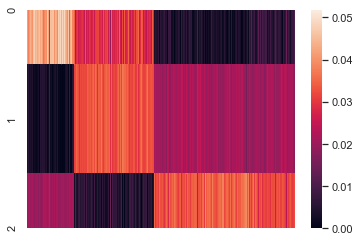

In [24]:
ax = sns.heatmap(Z[:q,:], xticklabels = False)

In [25]:
## let's try another set of hyperparameters

lambda_star = 0.2
lambdaO = 0.4

EPOCH = 5000
LR = 2e-3  # learning rate
MNT = 0.9   # momentum variable

T = 30 # use even number

model = RNMF_Encoder_simplified(m, n, q, lambda_star, lambdaO, eta, T, D)
optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MNT)

obj = np.zeros(EPOCH + 1)
tol = 1e-7

for K in range(EPOCH):
    Z = model(X, q, lambda_star, lambdaO)
        
    loss = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")      # error
    #print(K, loss.data)
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step()                    # apply gradients
    model.zero_grad()
    
    Z = Z.detach()
    #model.D = DictUpdate(model.D, X, Z, lambda_star, q, eps)
    #model.D.detach_()
    #print(K, torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro"))
    obj[K+1] = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")
    print('Iter = {}; Obj = {}; Err = {}'.format(K+1, obj[K+1], np.abs((obj[K]-obj[K+1])/(obj[K] + eps))))
          
    if np.abs((obj[K]-obj[K+1])/(obj[K] + eps)) < tol:
        print("Algorithm converged as per defined tolerance")
        break

Iter = 1; Obj = 0.7818244099617004; Err = 3399236565050871.5
Iter = 2; Obj = 0.7817992568016052; Err = 3.2172390340750584e-05
Iter = 3; Obj = 0.7817724347114563; Err = 3.4308155086584245e-05
Iter = 4; Obj = 0.7817463278770447; Err = 3.339441665176751e-05
Iter = 5; Obj = 0.7817199230194092; Err = 3.3776759408905175e-05
Iter = 6; Obj = 0.7816902995109558; Err = 3.78952967438104e-05
Iter = 7; Obj = 0.781661868095398; Err = 3.637171342109362e-05
Iter = 8; Obj = 0.7816303968429565; Err = 4.026197736636339e-05
Iter = 9; Obj = 0.7815990447998047; Err = 4.0111084827928776e-05
Iter = 10; Obj = 0.78156578540802; Err = 4.255300976370419e-05
Iter = 11; Obj = 0.7815322279930115; Err = 4.293613619616947e-05
Iter = 12; Obj = 0.7814992666244507; Err = 4.217531584773718e-05
Iter = 13; Obj = 0.7814672589302063; Err = 4.0956780909899495e-05
Iter = 14; Obj = 0.7814325094223022; Err = 4.446700422436539e-05
Iter = 15; Obj = 0.7813993096351624; Err = 4.2485802343233096e-05
Iter = 16; Obj = 0.7813656330108643

Iter = 127; Obj = 0.7777823209762573; Err = 3.662975592934594e-05
Iter = 128; Obj = 0.7777550220489502; Err = 3.509841580464803e-05
Iter = 129; Obj = 0.7777276039123535; Err = 3.5252921317625436e-05
Iter = 130; Obj = 0.7776987552642822; Err = 3.709351182363352e-05
Iter = 131; Obj = 0.777672290802002; Err = 3.4029194596409145e-05
Iter = 132; Obj = 0.777645468711853; Err = 3.4490222251926386e-05
Iter = 133; Obj = 0.7776180505752563; Err = 3.525788768768501e-05
Iter = 134; Obj = 0.777589738368988; Err = 3.6408885117013545e-05
Iter = 135; Obj = 0.7775636911392212; Err = 3.349739391041907e-05
Iter = 136; Obj = 0.7775383591651917; Err = 3.257864830651586e-05
Iter = 137; Obj = 0.7775111198425293; Err = 3.503277020518853e-05
Iter = 138; Obj = 0.7774837613105774; Err = 3.5187319195441556e-05
Iter = 139; Obj = 0.7774556279182434; Err = 3.618518319477295e-05
Iter = 140; Obj = 0.7774295210838318; Err = 3.3579838480976896e-05
Iter = 141; Obj = 0.7774012088775635; Err = 3.641771440431007e-05
Iter = 

Iter = 251; Obj = 0.7748377919197083; Err = 2.6077003313856342e-05
Iter = 252; Obj = 0.7748175263404846; Err = 2.615460866128327e-05
Iter = 253; Obj = 0.7747966647148132; Err = 2.6924566058692007e-05
Iter = 254; Obj = 0.7747762799263; Err = 2.6309855787372047e-05
Iter = 255; Obj = 0.7747553586959839; Err = 2.7002930856572196e-05
Iter = 256; Obj = 0.7747343182563782; Err = 2.715752704328078e-05
Iter = 257; Obj = 0.7747142314910889; Err = 2.592729509454807e-05
Iter = 258; Obj = 0.7746956944465637; Err = 2.3927590034674226e-05
Iter = 259; Obj = 0.7746753096580505; Err = 2.6313284892781434e-05
Iter = 260; Obj = 0.7746555805206299; Err = 2.546762130493475e-05
Iter = 261; Obj = 0.7746355533599854; Err = 2.5852986989484292e-05
Iter = 262; Obj = 0.7746168971061707; Err = 2.408391111636391e-05
Iter = 263; Obj = 0.7745967507362366; Err = 2.6008172568072346e-05
Iter = 264; Obj = 0.7745779156684875; Err = 2.4315965347286998e-05
Iter = 265; Obj = 0.7745566964149475; Err = 2.739460177059929e-05
Iter

Iter = 375; Obj = 0.7725913524627686; Err = 2.021262758449688e-05
Iter = 376; Obj = 0.7725747227668762; Err = 2.1524569022580888e-05
Iter = 377; Obj = 0.7725589275360107; Err = 2.0444923189966584e-05
Iter = 378; Obj = 0.7725433707237244; Err = 2.013673226972296e-05
Iter = 379; Obj = 0.7725282311439514; Err = 1.9597061274069757e-05
Iter = 380; Obj = 0.7725128531455994; Err = 1.990606651264926e-05
Iter = 381; Obj = 0.7724970579147339; Err = 2.0446560599169093e-05
Iter = 382; Obj = 0.7724804282188416; Err = 2.1527196410590756e-05
Iter = 383; Obj = 0.7724646925926208; Err = 2.037025877404529e-05
Iter = 384; Obj = 0.7724500298500061; Err = 1.8981764157444624e-05
Iter = 385; Obj = 0.7724342346191406; Err = 2.0448223516213237e-05
Iter = 386; Obj = 0.772416353225708; Err = 2.3149405646726483e-05
Iter = 387; Obj = 0.7724009156227112; Err = 1.9986116208385272e-05
Iter = 388; Obj = 0.7723866105079651; Err = 1.8520323392626916e-05
Iter = 389; Obj = 0.7723707556724548; Err = 2.052707192817191e-05
I

Iter = 499; Obj = 0.7708094716072083; Err = 1.8403567817727346e-05
Iter = 500; Obj = 0.7707964777946472; Err = 1.685735974928002e-05
Iter = 501; Obj = 0.7707847952842712; Err = 1.5156413803812127e-05
Iter = 502; Obj = 0.7707710266113281; Err = 1.7863187010632767e-05
Iter = 503; Obj = 0.7707594633102417; Err = 1.5002251884406563e-05
Iter = 504; Obj = 0.7707460522651672; Err = 1.7399779973982296e-05
Iter = 505; Obj = 0.7707328200340271; Err = 1.7168081628505444e-05
Iter = 506; Obj = 0.7707188725471497; Err = 1.8096396721273184e-05
Iter = 507; Obj = 0.7707064151763916; Err = 1.6163313500921885e-05
Iter = 508; Obj = 0.7706942558288574; Err = 1.5776886366511915e-05
Iter = 509; Obj = 0.7706831097602844; Err = 1.4462374007200557e-05
Iter = 510; Obj = 0.7706713080406189; Err = 1.5313323356986743e-05
Iter = 511; Obj = 0.7706600427627563; Err = 1.4617487046702249e-05
Iter = 512; Obj = 0.770648181438446; Err = 1.5391124039311556e-05
Iter = 513; Obj = 0.7706360220909119; Err = 1.5778078540954668e-

Iter = 622; Obj = 0.76936936378479; Err = 1.3247550152242237e-05
Iter = 623; Obj = 0.7693589329719543; Err = 1.3557613971500806e-05
Iter = 624; Obj = 0.7693486213684082; Err = 1.3402851522513572e-05
Iter = 625; Obj = 0.7693381905555725; Err = 1.3557979498475614e-05
Iter = 626; Obj = 0.7693278193473816; Err = 1.3480688100805793e-05
Iter = 627; Obj = 0.7693175077438354; Err = 1.3403393568803837e-05
Iter = 628; Obj = 0.7693066000938416; Err = 1.4178346240793563e-05
Iter = 629; Obj = 0.7692963480949402; Err = 1.3326284864989622e-05
Iter = 630; Obj = 0.7692859768867493; Err = 1.348142132300625e-05
Iter = 631; Obj = 0.7692769169807434; Err = 1.1777032570545777e-05
Iter = 632; Obj = 0.7692663073539734; Err = 1.3791687409080428e-05
Iter = 633; Obj = 0.7692550420761108; Err = 1.4644184666422903e-05
Iter = 634; Obj = 0.7692441344261169; Err = 1.4179497562288669e-05
Iter = 635; Obj = 0.769233763217926; Err = 1.3482336395915778e-05
Iter = 636; Obj = 0.7692241668701172; Err = 1.2475203595710107e-05

Iter = 745; Obj = 0.7681660056114197; Err = 1.0785372179916144e-05
Iter = 746; Obj = 0.7681576013565063; Err = 1.0940675390393945e-05
Iter = 747; Obj = 0.7681487202644348; Err = 1.1561549421433682e-05
Iter = 748; Obj = 0.7681387066841125; Err = 1.3035991674657027e-05
Iter = 749; Obj = 0.7681305408477783; Err = 1.063067941137695e-05
Iter = 750; Obj = 0.7681225538253784; Err = 1.039800134894668e-05
Iter = 751; Obj = 0.7681137919425964; Err = 1.1406881282611456e-05
Iter = 752; Obj = 0.768105685710907; Err = 1.0553425513883921e-05
Iter = 753; Obj = 0.7680983543395996; Err = 9.544742922437321e-06
Iter = 754; Obj = 0.768090009689331; Err = 1.0864038728125255e-05
Iter = 755; Obj = 0.7680807113647461; Err = 1.210577467180158e-05
Iter = 756; Obj = 0.7680717706680298; Err = 1.164030886861164e-05
Iter = 757; Obj = 0.7680624723434448; Err = 1.2106062141658617e-05
Iter = 758; Obj = 0.7680537104606628; Err = 1.1407773582855743e-05
Iter = 759; Obj = 0.7680453658103943; Err = 1.0864670211084242e-05
It

Iter = 869; Obj = 0.7671455144882202; Err = 1.0644329218069903e-05
Iter = 870; Obj = 0.7671378254890442; Err = 1.0022869235121435e-05
Iter = 871; Obj = 0.7671307325363159; Err = 9.245995299149513e-06
Iter = 872; Obj = 0.7671226859092712; Err = 1.0489251314536282e-05
Iter = 873; Obj = 0.7671152353286743; Err = 9.712371611188432e-06
Iter = 874; Obj = 0.7671074867248535; Err = 1.0100964579957601e-05
Iter = 875; Obj = 0.7671006321907043; Err = 8.935558924649771e-06
Iter = 876; Obj = 0.7670937776565552; Err = 8.935638769576524e-06
Iter = 877; Obj = 0.767085611820221; Err = 1.064516043810818e-05
Iter = 878; Obj = 0.7670774459838867; Err = 1.0645273758755249e-05
Iter = 879; Obj = 0.7670698761940002; Err = 9.86835152839785e-06
Iter = 880; Obj = 0.7670616507530212; Err = 1.0723196457428867e-05
Iter = 881; Obj = 0.7670535445213318; Err = 1.0567901134798316e-05
Iter = 882; Obj = 0.7670454978942871; Err = 1.0490306839920945e-05
Iter = 883; Obj = 0.7670373320579529; Err = 1.0645830471133167e-05
Ite

Iter = 994; Obj = 0.7662509679794312; Err = 9.645540392178335e-06
Iter = 995; Obj = 0.7662445902824402; Err = 8.32324820128383e-06
Iter = 996; Obj = 0.7662385702133179; Err = 7.856589395424553e-06
Iter = 997; Obj = 0.7662326097488403; Err = 7.778862496937071e-06
Iter = 998; Obj = 0.7662249803543091; Err = 9.957021450380192e-06
Iter = 999; Obj = 0.7662188410758972; Err = 8.012370477697525e-06
Iter = 1000; Obj = 0.7662119269371033; Err = 9.0237128393198e-06
Iter = 1001; Obj = 0.7662045955657959; Err = 9.56833357669054e-06
Iter = 1002; Obj = 0.7661973834037781; Err = 9.412840982109376e-06
Iter = 1003; Obj = 0.7661915421485901; Err = 7.623695035395336e-06
Iter = 1004; Obj = 0.7661852240562439; Err = 8.246100353018666e-06
Iter = 1005; Obj = 0.7661782503128052; Err = 9.101902803347164e-06
Iter = 1006; Obj = 0.7661712169647217; Err = 9.17978039787035e-06
Iter = 1007; Obj = 0.7661648392677307; Err = 8.32411457093468e-06
Iter = 1008; Obj = 0.7661578059196472; Err = 9.179941081893396e-06
Iter = 

Iter = 1117; Obj = 0.7654914855957031; Err = 7.786393681933291e-06
Iter = 1118; Obj = 0.7654862999916077; Err = 6.774215249988786e-06
Iter = 1119; Obj = 0.7654805183410645; Err = 7.552911846072589e-06
Iter = 1120; Obj = 0.7654749155044556; Err = 7.319371916909242e-06
Iter = 1121; Obj = 0.7654685974121094; Err = 8.253820233975555e-06
Iter = 1122; Obj = 0.7654629945755005; Err = 7.319485904227484e-06
Iter = 1123; Obj = 0.7654571533203125; Err = 7.63100924457836e-06
Iter = 1124; Obj = 0.7654513120651245; Err = 7.631067477324826e-06
Iter = 1125; Obj = 0.7654448747634888; Err = 8.409812007996794e-06
Iter = 1126; Obj = 0.7654398679733276; Err = 6.54101990385635e-06
Iter = 1127; Obj = 0.7654340267181396; Err = 7.631239803923857e-06
Iter = 1128; Obj = 0.7654282450675964; Err = 7.5534276520240205e-06
Iter = 1129; Obj = 0.7654224038124084; Err = 7.631355683082256e-06
Iter = 1130; Obj = 0.7654166221618652; Err = 7.553542350492617e-06
Iter = 1131; Obj = 0.7654117345809937; Err = 6.385517024411362e

Iter = 1240; Obj = 0.7648109793663025; Err = 6.390532784173547e-06
Iter = 1241; Obj = 0.764805793762207; Err = 6.780242746718419e-06
Iter = 1242; Obj = 0.7648007869720459; Err = 6.546485659455555e-06
Iter = 1243; Obj = 0.76479572057724; Err = 6.624463379498827e-06
Iter = 1244; Obj = 0.7647905945777893; Err = 6.702442642872889e-06
Iter = 1245; Obj = 0.7647848129272461; Err = 7.559782487132586e-06
Iter = 1246; Obj = 0.7647802233695984; Err = 6.001109815633435e-06
Iter = 1247; Obj = 0.764774739742279; Err = 7.170200211474142e-06
Iter = 1248; Obj = 0.764769971370697; Err = 6.23500141183813e-06
Iter = 1249; Obj = 0.7647649049758911; Err = 6.62473030528082e-06
Iter = 1250; Obj = 0.7647599577903748; Err = 6.468897152796752e-06
Iter = 1251; Obj = 0.7647535800933838; Err = 8.339475577923707e-06
Iter = 1252; Obj = 0.7647485733032227; Err = 6.546932621775283e-06
Iter = 1253; Obj = 0.7647425532341003; Err = 7.871958618126764e-06
Iter = 1254; Obj = 0.7647367715835571; Err = 7.560257394808564e-06
It

Iter = 1363; Obj = 0.7642072439193726; Err = 5.459647743527586e-06
Iter = 1364; Obj = 0.7642022967338562; Err = 6.473617668140518e-06
Iter = 1365; Obj = 0.7641977071762085; Err = 6.005684185091441e-06
Iter = 1366; Obj = 0.7641929388046265; Err = 6.239709354338273e-06
Iter = 1367; Obj = 0.7641882300376892; Err = 6.161751434947112e-06
Iter = 1368; Obj = 0.7641844749450684; Err = 4.913832055048021e-06
Iter = 1369; Obj = 0.7641804218292236; Err = 5.303844788286114e-06
Iter = 1370; Obj = 0.7641764283180237; Err = 5.225874788040077e-06
Iter = 1371; Obj = 0.7641716003417969; Err = 6.317881640805339e-06
Iter = 1372; Obj = 0.7641671895980835; Err = 5.7719283357377815e-06
Iter = 1373; Obj = 0.7641627788543701; Err = 5.7719616510867886e-06
Iter = 1374; Obj = 0.764159083366394; Err = 4.835995783011676e-06
Iter = 1375; Obj = 0.7641540169715881; Err = 6.630026281424178e-06
Iter = 1376; Obj = 0.7641493678092957; Err = 6.08406445457883e-06
Iter = 1377; Obj = 0.7641448378562927; Err = 5.928098868832933

Iter = 1486; Obj = 0.7636775374412537; Err = 5.775629139672428e-06
Iter = 1487; Obj = 0.7636730670928955; Err = 5.853711990969984e-06
Iter = 1488; Obj = 0.763668417930603; Err = 6.087896107399227e-06
Iter = 1489; Obj = 0.7636638879776001; Err = 5.931832319588391e-06
Iter = 1490; Obj = 0.763659656047821; Err = 5.5416130652191646e-06
Iter = 1491; Obj = 0.7636563777923584; Err = 4.2928226425008315e-06
Iter = 1492; Obj = 0.7636520862579346; Err = 5.619719220095365e-06
Iter = 1493; Obj = 0.7636474370956421; Err = 6.088063368310036e-06
Iter = 1494; Obj = 0.763643205165863; Err = 5.541732445469741e-06
Iter = 1495; Obj = 0.7636386156082153; Err = 6.010081169658579e-06
Iter = 1496; Obj = 0.763634979724884; Err = 4.761261749974436e-06
Iter = 1497; Obj = 0.7636315226554871; Err = 4.527122890858325e-06
Iter = 1498; Obj = 0.7636274695396423; Err = 5.307685348860497e-06
Iter = 1499; Obj = 0.7636237740516663; Err = 4.839385856957275e-06
Iter = 1500; Obj = 0.7636199593544006; Err = 4.995519253394668e-

Iter = 1609; Obj = 0.7631891369819641; Err = 3.9830556128282495e-06
Iter = 1610; Obj = 0.763185441493988; Err = 4.842165325738317e-06
Iter = 1611; Obj = 0.7631815671920776; Err = 5.076488229146742e-06
Iter = 1612; Obj = 0.763178288936615; Err = 4.295511846162568e-06
Iter = 1613; Obj = 0.7631752490997314; Err = 3.9831280941973854e-06
Iter = 1614; Obj = 0.763171911239624; Err = 4.373648269331759e-06
Iter = 1615; Obj = 0.7631680965423584; Err = 4.998477026530977e-06
Iter = 1616; Obj = 0.7631640434265137; Err = 5.310908387142726e-06
Iter = 1617; Obj = 0.7631601691246033; Err = 5.076630566876874e-06
Iter = 1618; Obj = 0.7631561756134033; Err = 5.232861149622104e-06
Iter = 1619; Obj = 0.7631519436836243; Err = 5.54529978827889e-06
Iter = 1620; Obj = 0.7631485462188721; Err = 4.4518850804443905e-06
Iter = 1621; Obj = 0.7631447911262512; Err = 4.920526468214804e-06
Iter = 1622; Obj = 0.7631403207778931; Err = 5.8577984284698355e-06
Iter = 1623; Obj = 0.7631369829177856; Err = 4.373848447713374

Iter = 1732; Obj = 0.7627532482147217; Err = 3.8290448682007585e-06
Iter = 1733; Obj = 0.762749195098877; Err = 5.313796898555552e-06
Iter = 1734; Obj = 0.7627459764480591; Err = 4.219802313201853e-06
Iter = 1735; Obj = 0.7627426981925964; Err = 4.297964937045753e-06
Iter = 1736; Obj = 0.7627394795417786; Err = 4.219838256725425e-06
Iter = 1737; Obj = 0.7627362608909607; Err = 4.219856063835481e-06
Iter = 1738; Obj = 0.7627328038215637; Err = 4.532457120806626e-06
Iter = 1739; Obj = 0.7627295255661011; Err = 4.29803916420174e-06
Iter = 1740; Obj = 0.7627258896827698; Err = 4.7669366524132644e-06
Iter = 1741; Obj = 0.762722373008728; Err = 4.610665626167073e-06
Iter = 1742; Obj = 0.7627190351486206; Err = 4.376245178510947e-06
Iter = 1743; Obj = 0.7627147436141968; Err = 5.626625567292799e-06
Iter = 1744; Obj = 0.7627110481262207; Err = 4.84517705605479e-06
Iter = 1745; Obj = 0.7627072930335999; Err = 4.923348927585194e-06
Iter = 1746; Obj = 0.7627037167549133; Err = 4.688926825780187e-

Iter = 1855; Obj = 0.7623475790023804; Err = 4.456562471975453e-06
Iter = 1856; Obj = 0.7623441815376282; Err = 4.456582333013032e-06
Iter = 1857; Obj = 0.762340247631073; Err = 5.160276224895157e-06
Iter = 1858; Obj = 0.7623368501663208; Err = 4.456625191644655e-06
Iter = 1859; Obj = 0.7623333930969238; Err = 4.534831808561292e-06
Iter = 1860; Obj = 0.7623308300971985; Err = 3.3620457250728536e-06
Iter = 1861; Obj = 0.7623278498649597; Err = 3.909368637746876e-06
Iter = 1862; Obj = 0.7623242735862732; Err = 4.691260705163724e-06
Iter = 1863; Obj = 0.7623217701911926; Err = 3.283897899235781e-06
Iter = 1864; Obj = 0.76231849193573; Err = 4.3003566090265096e-06
Iter = 1865; Obj = 0.7623155117034912; Err = 3.9094319110663655e-06
Iter = 1866; Obj = 0.762312650680542; Err = 3.753069306992624e-06
Iter = 1867; Obj = 0.7623099088668823; Err = 3.596704917884098e-06
Iter = 1868; Obj = 0.7623069882392883; Err = 3.83128640992669e-06
Iter = 1869; Obj = 0.7623037099838257; Err = 4.300439997563604e-

Iter = 1978; Obj = 0.7619782090187073; Err = 2.737816949245879e-06
Iter = 1979; Obj = 0.7619753479957581; Err = 3.7547306673024668e-06
Iter = 1980; Obj = 0.7619733214378357; Err = 2.6596108754617643e-06
Iter = 1981; Obj = 0.7619708180427551; Err = 3.285410407601312e-06
Iter = 1982; Obj = 0.7619675993919373; Err = 4.224112973432128e-06
Iter = 1983; Obj = 0.7619649767875671; Err = 3.441884369112372e-06
Iter = 1984; Obj = 0.7619619369506836; Err = 3.989470613676796e-06
Iter = 1985; Obj = 0.7619587182998657; Err = 4.224162207828779e-06
Iter = 1986; Obj = 0.7619554400444031; Err = 4.302405607958854e-06
Iter = 1987; Obj = 0.761952817440033; Err = 3.4419392949860087e-06
Iter = 1988; Obj = 0.7619498372077942; Err = 3.91130811587829e-06
Iter = 1989; Obj = 0.7619463801383972; Err = 4.537135160552393e-06
Iter = 1990; Obj = 0.7619429230690002; Err = 4.537155746241258e-06
Iter = 1991; Obj = 0.7619398832321167; Err = 3.9895860851372965e-06
Iter = 1992; Obj = 0.7619375586509705; Err = 3.0508721191748

Iter = 2100; Obj = 0.7616423964500427; Err = 3.2868270779144698e-06
Iter = 2101; Obj = 0.7616397142410278; Err = 3.521612015552377e-06
Iter = 2102; Obj = 0.7616366744041443; Err = 3.991174339660204e-06
Iter = 2103; Obj = 0.7616342306137085; Err = 3.2086039419029815e-06
Iter = 2104; Obj = 0.7616323828697205; Err = 2.426025398764229e-06
Iter = 2105; Obj = 0.7616298198699951; Err = 3.3651401686529982e-06
Iter = 2106; Obj = 0.7616273760795593; Err = 3.2086328187729742e-06
Iter = 2107; Obj = 0.7616251707077026; Err = 2.895604761532469e-06
Iter = 2108; Obj = 0.76162189245224; Err = 4.304289811746014e-06
Iter = 2109; Obj = 0.7616192102432251; Err = 3.5217068226026263e-06
Iter = 2110; Obj = 0.7616168856620789; Err = 3.0521566617232154e-06
Iter = 2111; Obj = 0.7616138458251953; Err = 3.991293970461763e-06
Iter = 2112; Obj = 0.7616118788719177; Err = 2.5826122888518794e-06
Iter = 2113; Obj = 0.7616095542907715; Err = 3.0521860421654016e-06
Iter = 2114; Obj = 0.7616070508956909; Err = 3.286979616

Iter = 2222; Obj = 0.761332631111145; Err = 3.28816439318805e-06
Iter = 2223; Obj = 0.7613298892974854; Err = 3.601334748605695e-06
Iter = 2224; Obj = 0.7613278031349182; Err = 2.740155872592459e-06
Iter = 2225; Obj = 0.7613256573677063; Err = 2.8184537633834466e-06
Iter = 2226; Obj = 0.7613233327865601; Err = 3.0533335160114062e-06
Iter = 2227; Obj = 0.7613204717636108; Err = 3.7579604170897624e-06
Iter = 2228; Obj = 0.7613183856010437; Err = 2.740189768319303e-06
Iter = 2229; Obj = 0.7613160610198975; Err = 3.0533626800632556e-06
Iter = 2230; Obj = 0.7613136172294617; Err = 3.2099551827623204e-06
Iter = 2231; Obj = 0.7613112330436707; Err = 3.1316736454708983e-06
Iter = 2232; Obj = 0.7613089084625244; Err = 3.0533913665593976e-06
Iter = 2233; Obj = 0.7613070607185364; Err = 2.4270620867535327e-06
Iter = 2234; Obj = 0.761304497718811; Err = 3.366578162197507e-06
Iter = 2235; Obj = 0.7613019943237305; Err = 3.2882967171054837e-06
Iter = 2236; Obj = 0.7612996697425842; Err = 3.053428420

Iter = 2344; Obj = 0.7610434889793396; Err = 3.367732765549252e-06
Iter = 2345; Obj = 0.7610411643981934; Err = 3.054465585610365e-06
Iter = 2346; Obj = 0.7610393762588501; Err = 2.349596088768366e-06
Iter = 2347; Obj = 0.7610371708869934; Err = 2.8978419849058453e-06
Iter = 2348; Obj = 0.7610342502593994; Err = 3.837693749689165e-06
Iter = 2349; Obj = 0.7610316276550293; Err = 3.4461055717574722e-06
Iter = 2350; Obj = 0.7610288858413696; Err = 3.6027591495984635e-06
Iter = 2351; Obj = 0.7610265016555786; Err = 3.132845330016276e-06
Iter = 2352; Obj = 0.7610237002372742; Err = 3.6811047951010908e-06
Iter = 2353; Obj = 0.7610212564468384; Err = 3.2111883441068692e-06
Iter = 2354; Obj = 0.7610191106796265; Err = 2.8195890636912266e-06
Iter = 2355; Obj = 0.7610169649124146; Err = 2.8195970137961306e-06
Iter = 2356; Obj = 0.7610148787498474; Err = 2.7412826038362595e-06
Iter = 2357; Obj = 0.7610127329826355; Err = 2.819612693301093e-06
Iter = 2358; Obj = 0.7610102295875549; Err = 3.2895574

Iter = 2466; Obj = 0.760772168636322; Err = 2.428768528174106e-06
Iter = 2467; Obj = 0.760770857334137; Err = 1.7236463676229007e-06
Iter = 2468; Obj = 0.7607687711715698; Err = 2.7421694022940356e-06
Iter = 2469; Obj = 0.7607674598693848; Err = 1.72365406513626e-06
Iter = 2470; Obj = 0.7607648968696594; Err = 3.368966025152856e-06
Iter = 2471; Obj = 0.7607625722885132; Err = 3.055584130925668e-06
Iter = 2472; Obj = 0.7607598900794983; Err = 3.5256847702483594e-06
Iter = 2473; Obj = 0.7607578039169312; Err = 2.742208933912999e-06
Iter = 2474; Obj = 0.7607554793357849; Err = 3.0556126197741375e-06
Iter = 2475; Obj = 0.7607536315917969; Err = 2.4288277090693754e-06
Iter = 2476; Obj = 0.7607513666152954; Err = 2.9772799069333634e-06
Iter = 2477; Obj = 0.7607498168945312; Err = 2.0370923171063254e-06
Iter = 2478; Obj = 0.7607476115226746; Err = 2.8989449720698395e-06
Iter = 2479; Obj = 0.7607453465461731; Err = 2.977303467218752e-06
Iter = 2480; Obj = 0.7607431411743164; Err = 2.8989620070

Iter = 2588; Obj = 0.7605257034301758; Err = 2.3511830447726376e-06
Iter = 2589; Obj = 0.7605240941047668; Err = 2.1160697155626106e-06
Iter = 2590; Obj = 0.7605223655700684; Err = 2.272820429865581e-06
Iter = 2591; Obj = 0.7605202794075012; Err = 2.743065373987965e-06
Iter = 2592; Obj = 0.760517954826355; Err = 3.0565669439495368e-06
Iter = 2593; Obj = 0.7605157494544983; Err = 2.8998287847037e-06
Iter = 2594; Obj = 0.7605140209197998; Err = 2.272845368062619e-06
Iter = 2595; Obj = 0.7605113983154297; Err = 3.448462879021338e-06
Iter = 2596; Obj = 0.7605094313621521; Err = 2.586356078218931e-06
Iter = 2597; Obj = 0.7605074048042297; Err = 2.664737396791389e-06
Iter = 2598; Obj = 0.7605052590370178; Err = 2.8214941739672167e-06
Iter = 2599; Obj = 0.7605032920837402; Err = 2.5863769569174643e-06
Iter = 2600; Obj = 0.7605017423629761; Err = 2.0377568122210225e-06
Iter = 2601; Obj = 0.7604997158050537; Err = 2.664764338430713e-06
Iter = 2602; Obj = 0.760498046875; Err = 2.1945176559918007

Iter = 2710; Obj = 0.760288417339325; Err = 1.9599314745238692e-06
Iter = 2711; Obj = 0.7602863907814026; Err = 2.6655120295733846e-06
Iter = 2712; Obj = 0.760284423828125; Err = 2.5871215129423884e-06
Iter = 2713; Obj = 0.7602831721305847; Err = 1.6463543130092718e-06
Iter = 2714; Obj = 0.7602818608283997; Err = 1.72475497699608e-06
Iter = 2715; Obj = 0.7602799534797668; Err = 2.5087388389540965e-06
Iter = 2716; Obj = 0.7602784633636475; Err = 1.959957134953475e-06
Iter = 2717; Obj = 0.7602764964103699; Err = 2.5871484888387273e-06
Iter = 2718; Obj = 0.7602744698524475; Err = 2.665553824077994e-06
Iter = 2719; Obj = 0.7602721452713013; Err = 3.0575551835791405e-06
Iter = 2720; Obj = 0.7602706551551819; Err = 1.959977264263734e-06
Iter = 2721; Obj = 0.7602688074111938; Err = 2.4303765711698533e-06
Iter = 2722; Obj = 0.7602674961090088; Err = 1.7247875649715711e-06
Iter = 2723; Obj = 0.7602656483650208; Err = 2.430386669815193e-06
Iter = 2724; Obj = 0.7602636814117432; Err = 2.587192097

Iter = 2832; Obj = 0.7600656151771545; Err = 2.274186245188331e-06
Iter = 2833; Obj = 0.7600632309913635; Err = 3.1368157477560974e-06
Iter = 2834; Obj = 0.760062038898468; Err = 1.568412793699999e-06
Iter = 2835; Obj = 0.7600606083869934; Err = 1.8820983043470583e-06
Iter = 2836; Obj = 0.7600587010383606; Err = 2.50946912886367e-06
Iter = 2837; Obj = 0.7600566148757935; Err = 2.744738747531793e-06
Iter = 2838; Obj = 0.7600549459457397; Err = 2.19579702491461e-06
Iter = 2839; Obj = 0.7600530982017517; Err = 2.431066329997962e-06
Iter = 2840; Obj = 0.7600513100624084; Err = 2.352650554931449e-06
Iter = 2841; Obj = 0.7600495219230652; Err = 2.3526560899091046e-06
Iter = 2842; Obj = 0.7600477337837219; Err = 2.352661624912804e-06
Iter = 2843; Obj = 0.7600468397140503; Err = 1.1763335799712736e-06
Iter = 2844; Obj = 0.7600452303886414; Err = 2.117402934720467e-06
Iter = 2845; Obj = 0.760043203830719; Err = 2.6663648968983345e-06
Iter = 2846; Obj = 0.7600417733192444; Err = 1.88214494570756

Iter = 2954; Obj = 0.7598642706871033; Err = 1.6472619212345234e-06
Iter = 2955; Obj = 0.759863018989563; Err = 1.6472646347108304e-06
Iter = 2956; Obj = 0.759861409664154; Err = 2.117915161966385e-06
Iter = 2957; Obj = 0.7598596215248108; Err = 2.353244052822798e-06
Iter = 2958; Obj = 0.7598577737808228; Err = 2.431691243613182e-06
Iter = 2959; Obj = 0.759855329990387; Err = 3.2161155944111117e-06
Iter = 2960; Obj = 0.7598533034324646; Err = 2.667031265529083e-06
Iter = 2961; Obj = 0.7598516941070557; Err = 2.1179422418324495e-06
Iter = 2962; Obj = 0.7598499655723572; Err = 2.2748316703006443e-06
Iter = 2963; Obj = 0.7598481178283691; Err = 2.4317221448385476e-06
Iter = 2964; Obj = 0.7598469257354736; Err = 1.5688568116938816e-06
Iter = 2965; Obj = 0.759844958782196; Err = 2.588617800465574e-06
Iter = 2966; Obj = 0.7598437070846558; Err = 1.6473065009068417e-06
Iter = 2967; Obj = 0.7598423361778259; Err = 1.8041958063900217e-06
Iter = 2968; Obj = 0.7598406076431274; Err = 2.2748596862

Iter = 3076; Obj = 0.7596712112426758; Err = 1.9615238466769387e-06
Iter = 3077; Obj = 0.7596695423126221; Err = 2.1969110175715212e-06
Iter = 3078; Obj = 0.7596681714057922; Err = 1.8046094432858324e-06
Iter = 3079; Obj = 0.7596662640571594; Err = 2.510765495522716e-06
Iter = 3080; Obj = 0.7596645951271057; Err = 2.1969253245466777e-06
Iter = 3081; Obj = 0.759662926197052; Err = 2.1969301510381625e-06
Iter = 3082; Obj = 0.7596611976623535; Err = 2.275396941034814e-06
Iter = 3083; Obj = 0.7596597075462341; Err = 1.9615535504119255e-06
Iter = 3084; Obj = 0.7596586346626282; Err = 1.412321326640499e-06
Iter = 3085; Obj = 0.7596569657325745; Err = 2.1969473886808714e-06
Iter = 3086; Obj = 0.7596556544303894; Err = 1.7261767405687386e-06
Iter = 3087; Obj = 0.7596536874771118; Err = 2.5892695803900325e-06
Iter = 3088; Obj = 0.7596510648727417; Err = 3.4523683796324693e-06
Iter = 3089; Obj = 0.7596492171287537; Err = 2.4323588466852825e-06
Iter = 3090; Obj = 0.7596468925476074; Err = 3.06007

Iter = 3198; Obj = 0.7594841122627258; Err = 1.805046785243067e-06
Iter = 3199; Obj = 0.7594826221466064; Err = 1.9620109167857012e-06
Iter = 3200; Obj = 0.7594811320304871; Err = 1.9620147662800918e-06
Iter = 3201; Obj = 0.7594799399375916; Err = 1.56961489263167e-06
Iter = 3202; Obj = 0.7594781517982483; Err = 2.3544260344896723e-06
Iter = 3203; Obj = 0.7594766616821289; Err = 1.9620263148538964e-06
Iter = 3204; Obj = 0.759475588798523; Err = 1.412661718374271e-06
Iter = 3205; Obj = 0.75947505235672; Err = 7.063318569951102e-07
Iter = 3206; Obj = 0.7594742178916931; Err = 1.0987392202891298e-06
Iter = 3207; Obj = 0.759472668170929; Err = 2.0405179368197564e-06
Iter = 3208; Obj = 0.7594709992408752; Err = 2.197485339044911e-06
Iter = 3209; Obj = 0.7594693899154663; Err = 2.1190083762831473e-06
Iter = 3210; Obj = 0.7594676613807678; Err = 2.275976782525395e-06
Iter = 3211; Obj = 0.7594661116600037; Err = 2.0405355526825857e-06
Iter = 3212; Obj = 0.7594649195671082; Err = 1.569645935751

Iter = 3320; Obj = 0.7593086957931519; Err = 1.0989787347614821e-06
Iter = 3321; Obj = 0.7593070864677429; Err = 2.11946131771149e-06
Iter = 3322; Obj = 0.7593052983283997; Err = 2.35496201093032e-06
Iter = 3323; Obj = 0.7593039274215698; Err = 1.8054751268719142e-06
Iter = 3324; Obj = 0.7593023777008057; Err = 2.040975567481481e-06
Iter = 3325; Obj = 0.7593011260032654; Err = 1.648483630557548e-06
Iter = 3326; Obj = 0.7592997550964355; Err = 1.8054850478755754e-06
Iter = 3327; Obj = 0.7592979669570923; Err = 2.354984749118764e-06
Iter = 3328; Obj = 0.7592962384223938; Err = 2.27649061858216e-06
Iter = 3329; Obj = 0.759294867515564; Err = 1.8054966697613922e-06
Iter = 3330; Obj = 0.7592933773994446; Err = 1.9624999234625025e-06
Iter = 3331; Obj = 0.7592922449111938; Err = 1.491502868905768e-06
Iter = 3332; Obj = 0.759290874004364; Err = 1.8055061658035557e-06
Iter = 3333; Obj = 0.7592892050743103; Err = 2.198011474718903e-06
Iter = 3334; Obj = 0.7592872977256775; Err = 2.51201863541024

Iter = 3442; Obj = 0.7591391801834106; Err = 1.6488352980776224e-06
Iter = 3443; Obj = 0.7591379880905151; Err = 1.5703219207047097e-06
Iter = 3444; Obj = 0.7591373324394226; Err = 8.636784126407342e-07
Iter = 3445; Obj = 0.7591366171836853; Err = 9.421954457255769e-07
Iter = 3446; Obj = 0.7591355443000793; Err = 1.413294500188007e-06
Iter = 3447; Obj = 0.7591343522071838; Err = 1.5703294417690824e-06
Iter = 3448; Obj = 0.7591331005096436; Err = 1.648848503092886e-06
Iter = 3449; Obj = 0.7591310143470764; Err = 2.7480853696645915e-06
Iter = 3450; Obj = 0.7591298818588257; Err = 1.4918218717574953e-06
Iter = 3451; Obj = 0.7591283917427063; Err = 1.96292644380699e-06
Iter = 3452; Obj = 0.7591267824172974; Err = 2.1199647206463594e-06
Iter = 3453; Obj = 0.7591256499290466; Err = 1.491830188267399e-06
Iter = 3454; Obj = 0.7591243982315063; Err = 1.648867404757296e-06
Iter = 3455; Obj = 0.7591230273246765; Err = 1.8059053733850686e-06
Iter = 3456; Obj = 0.7591218948364258; Err = 1.491837567

Iter = 3564; Obj = 0.7589835524559021; Err = 1.5706414444686754e-06
Iter = 3565; Obj = 0.7589819431304932; Err = 2.1203692803725814e-06
Iter = 3566; Obj = 0.758980393409729; Err = 2.0418414142610367e-06
Iter = 3567; Obj = 0.7589794993400574; Err = 1.1779878365687944e-06
Iter = 3568; Obj = 0.7589789032936096; Err = 7.853261494838481e-07
Iter = 3569; Obj = 0.7589778900146484; Err = 1.335055502576539e-06
Iter = 3570; Obj = 0.7589765191078186; Err = 1.8062539737587418e-06
Iter = 3571; Obj = 0.7589758634567261; Err = 8.638621564999382e-07
Iter = 3572; Obj = 0.7589747905731201; Err = 1.4135938408773953e-06
Iter = 3573; Obj = 0.7589733004570007; Err = 1.963327554344121e-06
Iter = 3574; Obj = 0.7589719295501709; Err = 1.8062648962862324e-06
Iter = 3575; Obj = 0.7589707970619202; Err = 1.4921345660354357e-06
Iter = 3576; Obj = 0.7589694857597351; Err = 1.7277373386892139e-06
Iter = 3577; Obj = 0.7589681148529053; Err = 1.8062739748511684e-06
Iter = 3578; Obj = 0.7589671611785889; Err = 1.256540

Iter = 3686; Obj = 0.758834719657898; Err = 1.2567599941874847e-06
Iter = 3687; Obj = 0.7588333487510681; Err = 1.8065947621005318e-06
Iter = 3688; Obj = 0.7588321566581726; Err = 1.5709548051226632e-06
Iter = 3689; Obj = 0.7588310241699219; Err = 1.492409409374263e-06
Iter = 3690; Obj = 0.7588297724723816; Err = 1.6495075984174776e-06
Iter = 3691; Obj = 0.7588286399841309; Err = 1.4924140984118274e-06
Iter = 3692; Obj = 0.7588272094726562; Err = 1.8851574640610434e-06
Iter = 3693; Obj = 0.7588263750076294; Err = 1.0996772604337375e-06
Iter = 3694; Obj = 0.7588251233100891; Err = 1.6495177045877167e-06
Iter = 3695; Obj = 0.7588236331939697; Err = 1.9637147922629315e-06
Iter = 3696; Obj = 0.7588227987289429; Err = 1.0996824431299221e-06
Iter = 3697; Obj = 0.7588216066360474; Err = 1.5709766463324681e-06
Iter = 3698; Obj = 0.7588205337524414; Err = 1.4138812028735717e-06
Iter = 3699; Obj = 0.7588199973106384; Err = 7.06941600968227e-07
Iter = 3700; Obj = 0.7588186264038086; Err = 1.80662

Iter = 3808; Obj = 0.7586944103240967; Err = 7.85620628512215e-07
Iter = 3809; Obj = 0.7586933374404907; Err = 1.4141182422824493e-06
Iter = 3810; Obj = 0.7586920261383057; Err = 1.7283691846858314e-06
Iter = 3811; Obj = 0.7586908340454102; Err = 1.5712474290463938e-06
Iter = 3812; Obj = 0.7586900591850281; Err = 1.0213124336146916e-06
Iter = 3813; Obj = 0.7586890459060669; Err = 1.3355637772163343e-06
Iter = 3814; Obj = 0.7586877942085266; Err = 1.649816281172689e-06
Iter = 3815; Obj = 0.7586867213249207; Err = 1.4141305740608067e-06
Iter = 3816; Obj = 0.7586857676506042; Err = 1.257006732292369e-06
Iter = 3817; Obj = 0.7586846947669983; Err = 1.4141343514053151e-06
Iter = 3818; Obj = 0.7586838006973267; Err = 1.178446959320089e-06
Iter = 3819; Obj = 0.7586826682090759; Err = 1.4927012408746847e-06
Iter = 3820; Obj = 0.7586814761161804; Err = 1.5712668095105318e-06
Iter = 3821; Obj = 0.7586802840232849; Err = 1.5712692783937977e-06
Iter = 3822; Obj = 0.758679211139679; Err = 1.4141445

Iter = 3930; Obj = 0.7585607171058655; Err = 1.4929412167753786e-06
Iter = 3931; Obj = 0.7585594058036804; Err = 1.7286713581235801e-06
Iter = 3932; Obj = 0.758558452129364; Err = 1.2572177064970257e-06
Iter = 3933; Obj = 0.7585572004318237; Err = 1.650100314312679e-06
Iter = 3934; Obj = 0.7585561871528625; Err = 1.3357976967390346e-06
Iter = 3935; Obj = 0.7585554718971252; Err = 9.429172807742856e-07
Iter = 3936; Obj = 0.7585546374320984; Err = 1.100071198179476e-06
Iter = 3937; Obj = 0.7585532665252686; Err = 1.8072618136972368e-06
Iter = 3938; Obj = 0.758551836013794; Err = 1.8858418225026813e-06
Iter = 3939; Obj = 0.7585505843162537; Err = 1.6501147065451717e-06
Iter = 3940; Obj = 0.758549690246582; Err = 1.1786553067344353e-06
Iter = 3941; Obj = 0.7585482597351074; Err = 1.8858507135430477e-06
Iter = 3942; Obj = 0.7585472464561462; Err = 1.3358134412377235e-06
Iter = 3943; Obj = 0.7585462331771851; Err = 1.3358152256376568e-06
Iter = 3944; Obj = 0.758544921875; Err = 1.72870436593

Iter = 4052; Obj = 0.7584314346313477; Err = 1.2574282574307719e-06
Iter = 4053; Obj = 0.7584301233291626; Err = 1.7289660280180512e-06
Iter = 4054; Obj = 0.7584291696548462; Err = 1.257432012615815e-06
Iter = 4055; Obj = 0.7584279179573059; Err = 1.6503815918009037e-06
Iter = 4056; Obj = 0.7584267854690552; Err = 1.4932048569395787e-06
Iter = 4057; Obj = 0.7584258913993835; Err = 1.1788476999502523e-06
Iter = 4058; Obj = 0.7584251761436462; Err = 9.430792717070322e-07
Iter = 4059; Obj = 0.7584238648414612; Err = 1.7289802953617033e-06
Iter = 4060; Obj = 0.7584224343299866; Err = 1.8861635833524368e-06
Iter = 4061; Obj = 0.7584210634231567; Err = 1.8075768434317014e-06
Iter = 4062; Obj = 0.758420467376709; Err = 7.859043959876749e-07
Iter = 4063; Obj = 0.7584190964698792; Err = 1.8075815313579238e-06
Iter = 4064; Obj = 0.758418083190918; Err = 1.336040938180521e-06
Iter = 4065; Obj = 0.7584168910980225; Err = 1.5718149684568167e-06
Iter = 4066; Obj = 0.7584157586097717; Err = 1.4932265

Iter = 4174; Obj = 0.7583047747612; Err = 1.965058431405469e-06
Iter = 4175; Obj = 0.7583039999008179; Err = 1.0218323922912018e-06
Iter = 4176; Obj = 0.7583031058311462; Err = 1.1790385805004307e-06
Iter = 4177; Obj = 0.7583025097846985; Err = 7.860266470893628e-07
Iter = 4178; Obj = 0.7583011984825134; Err = 1.7292599828410243e-06
Iter = 4179; Obj = 0.7583003640174866; Err = 1.100440073845817e-06
Iter = 4180; Obj = 0.7582993507385254; Err = 1.3362501315616854e-06
Iter = 4181; Obj = 0.7582982778549194; Err = 1.4148549710772198e-06
Iter = 4182; Obj = 0.7582973837852478; Err = 1.1790474774122012e-06
Iter = 4183; Obj = 0.758296549320221; Err = 1.1004456097290078e-06
Iter = 4184; Obj = 0.7582957744598389; Err = 1.021843476374389e-06
Iter = 4185; Obj = 0.7582951188087463; Err = 8.646376712257699e-07
Iter = 4186; Obj = 0.7582942247390747; Err = 1.1790523893064348e-06
Iter = 4187; Obj = 0.7582929730415344; Err = 1.6506752912616546e-06
Iter = 4188; Obj = 0.7582920789718628; Err = 1.1790557257

Iter = 4296; Obj = 0.7581847310066223; Err = 1.1006079050533858e-06
Iter = 4297; Obj = 0.7581844925880432; Err = 3.1445974754070847e-07
Iter = 4298; Obj = 0.7581837177276611; Err = 1.0219945008834353e-06
Iter = 4299; Obj = 0.7581827640533447; Err = 1.2578406712089386e-06
Iter = 4300; Obj = 0.7581815123558044; Err = 1.6509179575534837e-06
Iter = 4301; Obj = 0.7581803798675537; Err = 1.4936901418416017e-06
Iter = 4302; Obj = 0.7581794261932373; Err = 1.257846208804357e-06
Iter = 4303; Obj = 0.7581784129142761; Err = 1.3364632779198968e-06
Iter = 4304; Obj = 0.7581773400306702; Err = 1.4150806560596933e-06
Iter = 4305; Obj = 0.758176326751709; Err = 1.3364669552649129e-06
Iter = 4306; Obj = 0.7581749558448792; Err = 1.8081635913210658e-06
Iter = 4307; Obj = 0.7581744194030762; Err = 7.075435542192588e-07
Iter = 4308; Obj = 0.7581734657287598; Err = 1.2578560974888786e-06
Iter = 4309; Obj = 0.7581727504730225; Err = 9.433932597696231e-07
Iter = 4310; Obj = 0.7581716775894165; Err = 1.41509

Iter = 4418; Obj = 0.758069634437561; Err = 1.4939083528111459e-06
Iter = 4419; Obj = 0.7580691576004028; Err = 6.290149829796407e-07
Iter = 4420; Obj = 0.7580679059028625; Err = 1.6511653689293132e-06
Iter = 4421; Obj = 0.7580670714378357; Err = 1.1007787301872602e-06
Iter = 4422; Obj = 0.7580662965774536; Err = 1.0221528031950922e-06
Iter = 4423; Obj = 0.7580654621124268; Err = 1.1007810670688603e-06
Iter = 4424; Obj = 0.7580646276473999; Err = 1.1007822787891518e-06
Iter = 4425; Obj = 0.7580640912055969; Err = 7.076465296149285e-07
Iter = 4426; Obj = 0.7580630779266357; Err = 1.3366666129379103e-06
Iter = 4427; Obj = 0.7580621838569641; Err = 1.1794132937805287e-06
Iter = 4428; Obj = 0.7580621242523193; Err = 7.862764565319247e-08
Algorithm converged as per defined tolerance


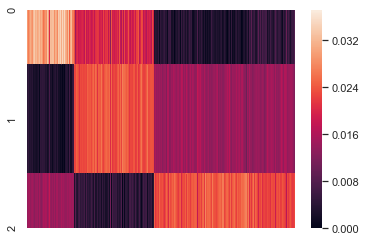

In [26]:
ax = sns.heatmap(Z[:q,:], xticklabels = False)

In [27]:
import pandas as pd

## save learned data for future processing
pd.DataFrame(Z[:q,:]).to_csv("RNMFOutput/LearnableBest-coeff.csv")
pd.DataFrame(model.D).to_csv("RNMFOutput/LearnableBest-basis.csv")
pd.DataFrame(Z[q:,:]).to_csv("RNMFOutput/LearnableBest-outlier.csv")
np.savetxt("RNMFOutput/LearnableBest-obj.txt", obj, delimiter="\n")

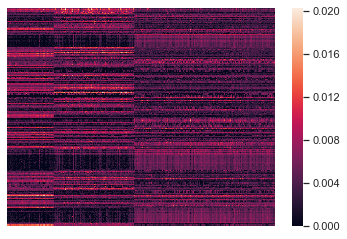

In [28]:
## plot original data
ax = sns.heatmap(X, xticklabels = False, yticklabels=False)

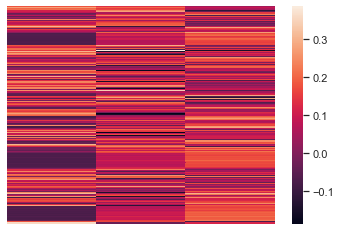

In [30]:
## plot dictionary
ax = sns.heatmap(model.D.detach(), xticklabels = False, yticklabels=False)

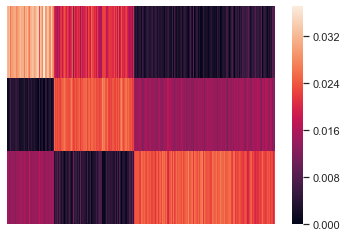

In [31]:
## plot coefficient
ax = sns.heatmap(Z[:q,:], xticklabels = False, yticklabels=False)

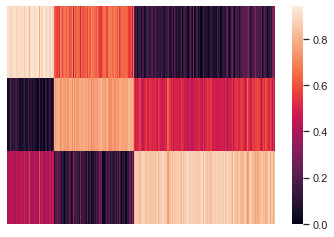

In [32]:
## plot coefficient - normalized (there is no difference)
ax = sns.heatmap(NormDict(Z[:q,:]), xticklabels = False, yticklabels=False)

### Make figure 1: compare proximal splitting and learnable pursuit convergence

In [6]:
[m, n] = X.shape

q = 3
eps = 2.3e-16

D = torch.rand(m,q)
D += eps

D = NormDict(D)

alpha = PowerMethod(D)
eta = 1/alpha

In [7]:
lambda_star = 0.2
lambdaO = 0.3

#EPOCH = 5000
LR = 1e-3  # learning rate
MNT = 0.9   # momentum variable

#T = 30 # use even number

for T in range(200):
    model = RNMF_Encoder_simplified(m, n, q, lambda_star, lambdaO, eta, T + 1, D)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MNT)

    Z = model(X, q, lambda_star, lambdaO)
        
    loss = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")      # error
    #print(K, loss.data)
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step()                    # apply gradients
    model.zero_grad()
    
    Z = Z.detach()
    #model.D = DictUpdate(model.D, X, Z, lambda_star, q, eps)
    #model.D.detach_()
    #print(K, torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro"))
    obj = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")
    print('T = {}; Obj = {}'.format(T+1, obj))


T = 1; Obj = 1.8068989515304565
T = 2; Obj = 1.8157362937927246
T = 3; Obj = 1.812985897064209
T = 4; Obj = 1.8120344877243042
T = 5; Obj = 1.8110074996948242
T = 6; Obj = 1.8100415468215942
T = 7; Obj = 1.8091025352478027
T = 8; Obj = 1.8081755638122559
T = 9; Obj = 1.8072861433029175
T = 10; Obj = 1.8064121007919312
T = 11; Obj = 1.8055528402328491
T = 12; Obj = 1.8046953678131104
T = 13; Obj = 1.8038467168807983
T = 14; Obj = 1.8030133247375488
T = 15; Obj = 1.8021830320358276
T = 16; Obj = 1.8013547658920288
T = 17; Obj = 1.8005337715148926
T = 18; Obj = 1.79970383644104
T = 19; Obj = 1.798879861831665
T = 20; Obj = 1.798056960105896
T = 21; Obj = 1.7972381114959717
T = 22; Obj = 1.7964277267456055
T = 23; Obj = 1.7956103086471558
T = 24; Obj = 1.794797420501709
T = 25; Obj = 1.7939889430999756
T = 26; Obj = 1.7931818962097168
T = 27; Obj = 1.7923686504364014
T = 28; Obj = 1.7915652990341187
T = 29; Obj = 1.7907555103302002
T = 30; Obj = 1.7899458408355713
T = 31; Obj = 1.789139866

In [12]:
########################################
# rerun with well-initialized dictionary
########################################

D = model.D.detach()
D[D < 0] = eps
D = NormDict(D)

alpha = PowerMethod(D)
eta = 1/alpha

In [17]:
for T in range(200):
    model = RNMF_Encoder_simplified(m, n, q, lambda_star, lambdaO, eta, T + 1, D)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MNT)

    Z = model(X, q, lambda_star, lambdaO)
        
    loss = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")      # error
    #print(K, loss.data)
    optimizer.zero_grad()               # clear gradients for this training step
    loss.backward()                     # backpropagation, compute gradients
    optimizer.step()                    # apply gradients
    model.zero_grad()
    
    Z = Z.detach()
    #model.D = DictUpdate(model.D, X, Z, lambda_star, q, eps)
    #model.D.detach_()
    #print(K, torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro"))
    obj = torch.norm(X - torch.mm(model.D, Z[:q,:]) - Z[q:,:], p="fro")
    print('T = {}; Obj = {}'.format(T+1, obj))

T = 1; Obj = 1.5575001239776611
T = 2; Obj = 1.5693975687026978
T = 3; Obj = 1.5662952661514282
T = 4; Obj = 1.565558910369873
T = 5; Obj = 1.5647650957107544
T = 6; Obj = 1.564074993133545
T = 7; Obj = 1.5634633302688599
T = 8; Obj = 1.562904715538025
T = 9; Obj = 1.5623811483383179
T = 10; Obj = 1.5618919134140015
T = 11; Obj = 1.5614171028137207
T = 12; Obj = 1.5609568357467651
T = 13; Obj = 1.5605190992355347
T = 14; Obj = 1.5600969791412354
T = 15; Obj = 1.5596837997436523
T = 16; Obj = 1.5592610836029053
T = 17; Obj = 1.5588469505310059
T = 18; Obj = 1.558444857597351
T = 19; Obj = 1.5580521821975708
T = 20; Obj = 1.5576621294021606
T = 21; Obj = 1.5572712421417236
T = 22; Obj = 1.5568830966949463
T = 23; Obj = 1.5565037727355957
T = 24; Obj = 1.5561168193817139
T = 25; Obj = 1.5557360649108887
T = 26; Obj = 1.5553547143936157
T = 27; Obj = 1.554974913597107
T = 28; Obj = 1.554599642753601
T = 29; Obj = 1.5542235374450684
T = 30; Obj = 1.553849458694458
T = 31; Obj = 1.5534745454